# Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Flatten
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam


# Load Data


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)


(60000, 28, 28)


In [ ]:
print(x_test.shape)


(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


#Visualizing  Digits


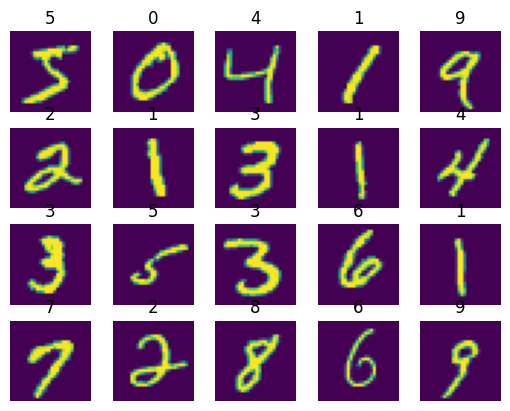

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

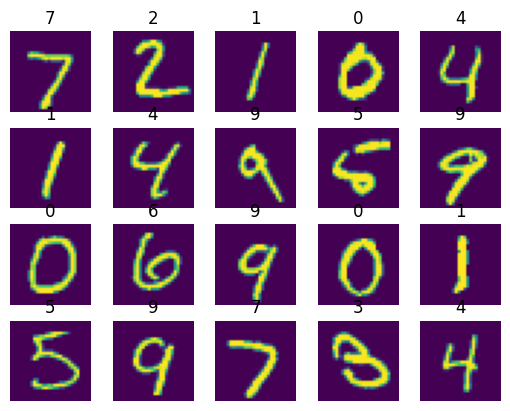

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_test[i])
  plt.title(y_test[i])
  plt.axis("off")
plt.show()

#Preprocess Data

## Normalize

In [ ]:
x_train=x_train/255
x_test=x_test/255

## Convert Labels to Categorical

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

## Reshape

In [ ]:
num_samples_train,img_rows,img_cols=x_train.shape
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


# Build Neural Network Model(Learning_rate=0.001,Batch_size=32)

In [ ]:
model = Sequential([
    Input(shape=(img_rows * img_cols,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy",
    metrics=["accuracy"] )


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9969 - loss: 0.0106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9974 - loss: 0.0092
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9981 - loss: 0.0068
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9982 - loss: 0.0063
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9981 - loss: 0.0066
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9981 - loss: 0.0059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9989 - loss: 0.0039
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9990 - loss: 0.0035


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")


Test Loss     : 0.1005
Test Accuracy : 97.99%


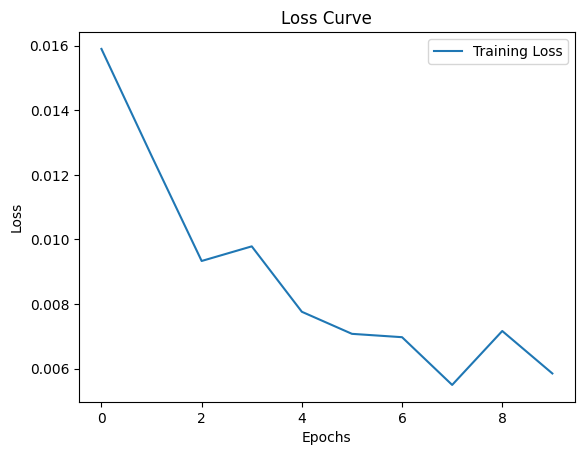

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Loss Curve: The curve gradually descends with increasing epochs. This indicates that the model is learning well and reducing error over time.

Test Loss = 0.1005: This is a very small value, indicating that the model is able to make predictions that are very close to the correct one.

Test Accuracy ≈ 98%: This is a very high percentage, indicating that the model was able to distinguish numbers in MNIST very well.

🔹 Conclusion:
Using learning_rate = 0.001 and batch_size = 32, the model achieved very strong performance (low loss + high accuracy). There are no clear signs of overfitting (because the loss curve does not increase).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


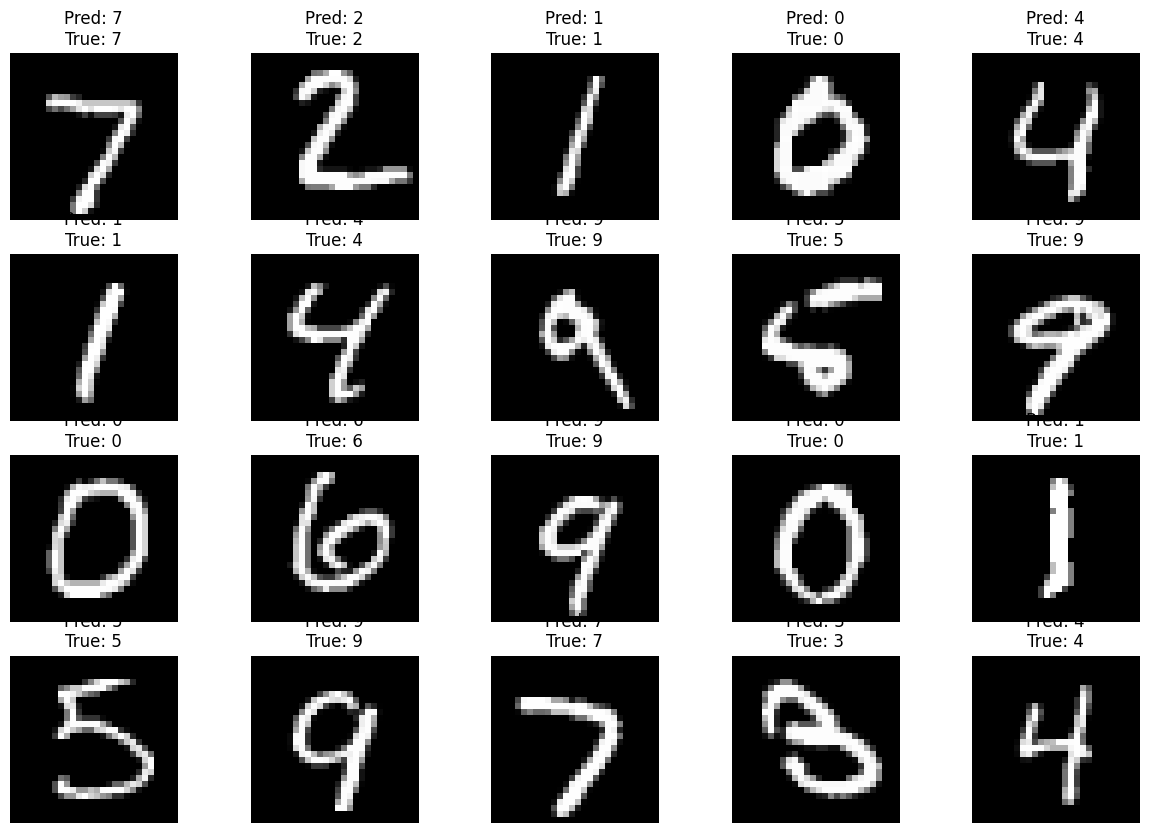

In [ ]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
plt.show()

The First_model was able to make correct predictions as the predicted values ​​matched the actual values

# Tune hyperparameters(Learning_Rate=0.01,Batch_size=42)

In [ ]:
second_model= Sequential([
    Input(shape=(img_rows * img_cols,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
second_model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy",
    metrics=["accuracy"] )

In [ ]:
second_history = second_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=42,
    verbose=1
)


Epoch 1/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9021 - loss: 0.3180
Epoch 2/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9572 - loss: 0.1444
Epoch 3/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9627 - loss: 0.1342
Epoch 4/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9689 - loss: 0.1074
Epoch 5/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9734 - loss: 0.0982
Epoch 6/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9740 - loss: 0.0966
Epoch 7/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0858
Epoch 8/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9765 - loss: 0.0935
Epoch 9/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9798 - loss: 0.0760
Epoch 10/10
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9782 - loss: 0.0861


In [ ]:
loss, accuracy = second_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")


Test Loss     : 0.2041
Test Accuracy : 96.63%


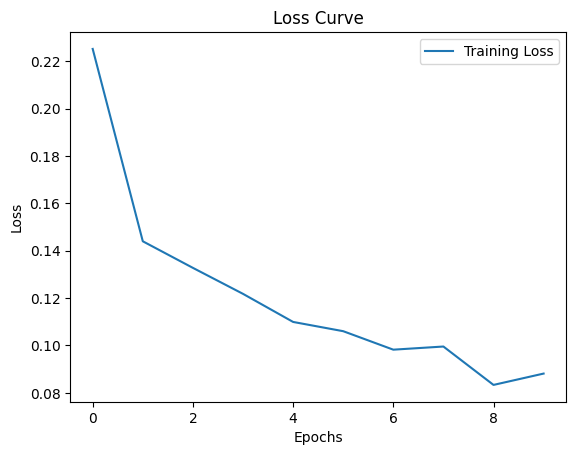

In [ ]:
plt.plot(second_history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Loss Curve: The curve gradually descends as the number of epochs increases. This indicates that the model is learning well and reducing the error over time. There are no clear signs of overfitting because the curve never rises above the threshold.

Test Loss = 0.2041: This value is relatively small, indicating that the model is able to make predictions close to the correct values.

Test Accuracy ≈ 96.63%: This is a very high percentage, indicating that the model was able to recognize the data well.

🔹 Conclusion: After applying hyperparameter tuning using learning_rate = 0.01 and batch_size = 42, the model achieved strong performance, characterized by low loss and high accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


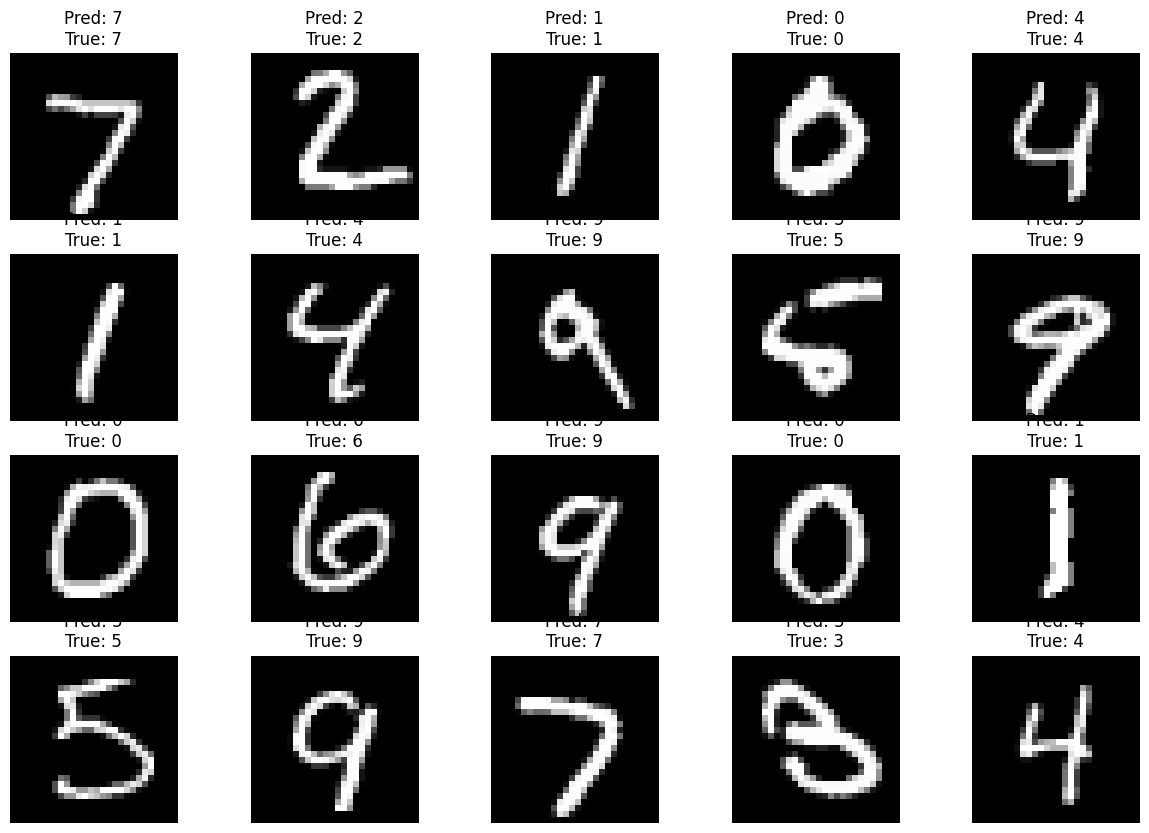

In [ ]:
predictions = second_model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
plt.show()


Also,The second_model was able to make correct predictions as the predicted values ​​matched the actual values

In [ ]:
print("the First Model Before Tune hyperparameters:")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")
print("================================")

print("the Second Model After Tune hyperparameters:")

loss, accuracy = second_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")

the First Model Before Tune hyperparameters:
Test Loss     : 0.1005
Test Accuracy : 97.99%
the Second Model After Tune hyperparameters:
Test Loss     : 0.2041
Test Accuracy : 96.63%


From the above figures, we can conclude that although the model's predictions were correct after modifying the hyperparameters, its performance declined (higher loss and lower accuracy) compared to the unmodified version. In contrast, the first model achieved better results (higher accuracy and lower loss), making it the best-performing model based on the test data.